<a href="https://colab.research.google.com/github/Pragya-code/Mini_Project/blob/main/2505496_Pragya_Rajbanshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Name: Pragya Rajbanshi

Group: L5CG3

University ID: 2505496

Concepts and Technologies of AI

Mini Project - Regression

Regression Task

Shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Columns:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Missing values per column:


,MissingCount
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0



Duplicate rows: 0

Missing values after fillna:


,MissingCount
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


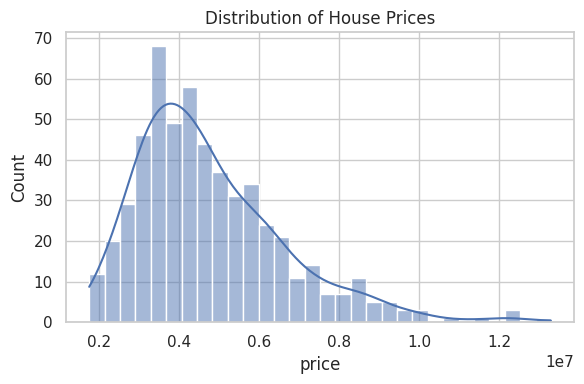

Insight: shows the overall distribution and skewness of house prices.


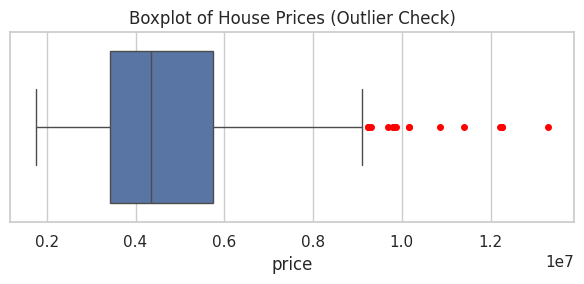

Insight: red points beyond the whiskers indicate potential outliers (IQR rule).


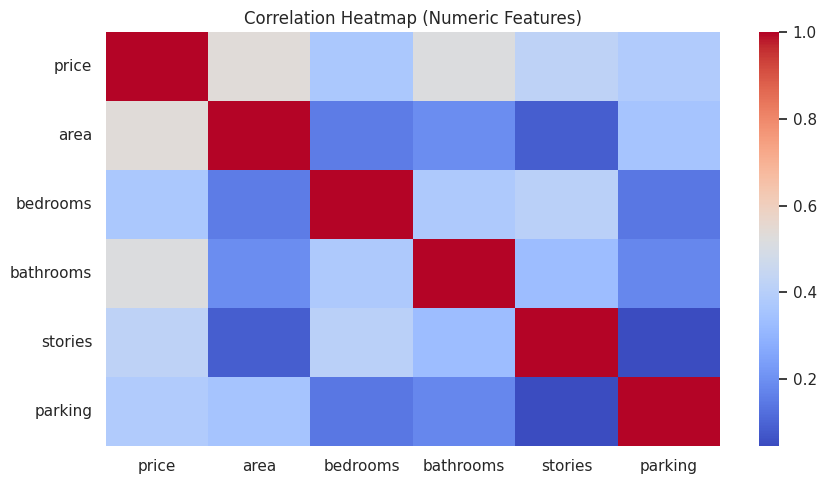

Insight: shows which numeric features correlate with price.


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

# Load dataset
path_reg = "/content/drive/MyDrive/Mini_Project/Housing.csv"
df = pd.read_csv(path_reg)
df.columns = df.columns.str.strip()

if "Price" in df.columns:
    df.rename(columns={"Price": "price"}, inplace=True)

if "price" not in df.columns:
    raise ValueError("Target column not found. Expected 'price' or 'Price'.")

# Drop Address if present
if "Address" in df.columns:
    df.drop(columns=["Address"], inplace=True)

print("Shape:", df.shape)
display(df.head())

print("\nColumns:")
print(df.columns.tolist())

print("\nMissing values per column:")
display(df.isnull().sum().to_frame("MissingCount"))

print("\nDuplicate rows:", df.duplicated().sum())

# Fill missing values: numeric -> median, categorical -> mode
num_cols = df.select_dtypes(include=["int64","float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

for c in num_cols:
    df[c] = df[c].fillna(df[c].median())
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

print("\nMissing values after fillna:")
display(df.isnull().sum().to_frame("MissingCount"))

# EDA plots
plt.figure(figsize=(6,4))
sns.histplot(df["price"], kde=True, bins=30)
plt.title("Distribution of House Prices")
plt.tight_layout()
plt.show()
print("Insight: shows the overall distribution and skewness of house prices.")

# Outlier check (price)
plt.figure(figsize=(6,3))
sns.boxplot(
    x=df["price"],
    showfliers=True,
    flierprops={"marker":"o", "markersize":4, "markerfacecolor":"red", "markeredgecolor":"red"}
)
plt.title("Boxplot of House Prices (Outlier Check)")
plt.tight_layout()
plt.show()
print("Insight: red points beyond the whiskers indicate potential outliers (IQR rule).")

plt.figure(figsize=(9,5))
sns.heatmap(df.select_dtypes(include=["int64","float64"]).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()
print("Insight: shows which numeric features correlate with price.")

In [ ]:

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.neural_network import MLPRegressor

# 7 baseline regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Split features/target
X = df.drop(columns=["price"])
y = df["price"]

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling (needed for MLP, SVR, KNN, Ridge/Linear)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

def eval_reg(model, name, use_scaled=True):
    Xtr = X_train_sc if use_scaled else X_train.values
    Xte = X_test_sc if use_scaled else X_test.values

    model.fit(Xtr, y_train)
    pred = model.predict(Xte)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    return {
        "Model": name,
        "MAE": mean_absolute_error(y_test, pred),
        "RMSE": rmse,
        "R2": r2_score(y_test, pred)
    }

# Neural Network (MLPRegressor)
mlp = MLPRegressor(hidden_layer_sizes=(64,32), activation="relu",
                   solver="adam", max_iter=2000, random_state=42)

mlp_res = eval_reg(mlp, "Neural Net (MLPRegressor)", use_scaled=True)
print("Neural Network Results:")
display(pd.DataFrame([mlp_res]))

# 7 baseline models
baseline_models = [
    ("LinearRegression", LinearRegression(), True),
    ("Ridge", Ridge(alpha=1.0, random_state=42), True),
    ("DecisionTree", DecisionTreeRegressor(random_state=42), False),
    ("RandomForest", RandomForestRegressor(n_estimators=400, random_state=42), False),
    ("KNN", KNeighborsRegressor(n_neighbors=7), True),
    ("SVR(RBF)", SVR(kernel="rbf", C=10, gamma="scale"), True),
    ("GradientBoosting", GradientBoostingRegressor(random_state=42), False)
]

results = []
for name, model, scaled in baseline_models:
    results.append(eval_reg(model, name, use_scaled=scaled))

baseline_df = pd.DataFrame(results).sort_values("RMSE")
print("\nBaseline Comparison (7 models) sorted by RMSE (lower is better):")
display(baseline_df)

print("\nPrimary models for tuning (2 models): Ridge + Random Forest")

Neural Network Results:


,Model,MAE,RMSE,R2
0,Neural Net (MLPRegressor),2.884391e+06,3.192857e+06,-1.016855



Baseline Comparison (7 models) sorted by RMSE (lower is better):


,Model,MAE,RMSE,R2
6,GradientBoosting,9.597490e+05,1.299386e+06,0.665965
0,LinearRegression,9.700434e+05,1.324507e+06,0.652924
1,Ridge,9.698579e+05,1.324703e+06,0.652821
3,RandomForest,1.014996e+06,1.397649e+06,0.613533
4,KNN,1.031459e+06,1.420861e+06,0.600590
2,DecisionTree,1.195266e+06,1.625670e+06,0.477146
5,SVR(RBF),1.763770e+06,2.359554e+06,-0.101477



Primary models for tuning (2 models): Ridge + Random Forest


In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression

# Hyperparameter tuning: Ridge
ridge = Ridge(random_state=42)
grid_ridge = GridSearchCV(
    ridge,
    param_grid={"alpha":[0.01, 0.1, 1, 10, 50, 100]},
    cv=5,
    scoring="r2",
    n_jobs=-1
)
grid_ridge.fit(X_train_sc, y_train)
print("Best Ridge params:", grid_ridge.best_params_)
print("Best Ridge CV R2:", grid_ridge.best_score_)

# Hyperparameter tuning: Random Forest
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(
    rf,
    param_grid={
        "n_estimators":[300, 600],
        "max_depth":[None, 5, 10],
        "min_samples_split":[2, 5],
        "min_samples_leaf":[1, 2]
    },
    cv=5,
    scoring="r2",
    n_jobs=-1
)
grid_rf.fit(X_train.values, y_train)
print("\nBest RF params:", grid_rf.best_params_)
print("Best RF CV R2:", grid_rf.best_score_)

# Feature selection
k = 10

# Ridge feature selection (scaled)
selector_r = SelectKBest(score_func=f_regression, k=k)
X_train_fs_r = selector_r.fit_transform(X_train_sc, y_train)
X_test_fs_r  = selector_r.transform(X_test_sc)

# RF feature selection (unscaled)
selector_rf = SelectKBest(score_func=f_regression, k=k)
X_train_fs_rf = selector_rf.fit_transform(X_train.values, y_train)
X_test_fs_rf  = selector_rf.transform(X_test.values)

selected_features_r = X.columns[selector_r.get_support(indices=True)]
print(f"\nSelected features (Top {k}) [same idea for both models]:")
print(list(selected_features_r))

# Final models
final_ridge = Ridge(random_state=42, **grid_ridge.best_params_)
final_ridge.fit(X_train_fs_r, y_train)
pred_ridge = final_ridge.predict(X_test_fs_r)

final_rf = RandomForestRegressor(random_state=42, **grid_rf.best_params_)
final_rf.fit(X_train_fs_rf, y_train)
pred_rf = final_rf.predict(X_test_fs_rf)

# Final comparison table
def reg_row(name, pred, cv_score):
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    return {
        "Model": name,
        "Features Used": f"Selected ({k})",
        "CV Score": round(cv_score, 4),
        "Test RMSE": round(rmse, 4),
        "Test R-squared": round(r2_score(y_test, pred), 4)
    }

final_table_reg = pd.DataFrame([
    reg_row("Final Ridge", pred_ridge, grid_ridge.best_score_),
    reg_row("Final Random Forest", pred_rf, grid_rf.best_score_)
])

print("\nFinal Comparison Table (Regression):")
display(final_table_reg)

Best Ridge params: {'alpha': 50}
Best Ridge CV R2: 0.6500340146182368

Best RF params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 600}
Best RF CV R2: 0.6155713103291333

Selected features (Top 10) [same idea for both models]:
['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_unfurnished']

Final Comparison Table (Regression):


,Model,Features Used,CV Score,Test RMSE,Test R-squared
0,Final Ridge,Selected (10),0.6500,1.354459e+06,0.6370
1,Final Random Forest,Selected (10),0.6156,1.425938e+06,0.5977
